# Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [586]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
  

In [877]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [878]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [879]:
type(df)

pandas.core.frame.DataFrame

In [880]:
type(df.columns)

pandas.core.indexes.base.Index

In [881]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [882]:
df.shape

(907, 27)

In [883]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
573,IND,India,PAPANASAM,IND0000324,32.00,8.7065,77.3627,Hydro,NaN,NaN,...,2019.0,NaN,117.63885,115.98715,66.20730,114.7036,120.30545,NaN,Central Electricity Authority,NaN
824,IND,India,TVS Tirunelveli Wind Farm,WRI1026774,14.40,8.9165,77.6590,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,IND,India,KARBI LANGPI,IND0000181,100.00,25.9552,92.5171,Hydro,NaN,NaN,...,2019.0,NaN,400.41785,406.83560,394.60705,482.5551,370.85640,NaN,Central Electricity Authority,NaN
234,IND,India,GODAVARI GT,IND0000134,205.24,17.0587,82.3097,Gas,NaN,NaN,...,2019.0,NaN,525.09900,535.41100,933.37000,553.6150,1110.42000,NaN,Central Electricity Authority,NaN
297,IND,India,JSW RATNAGIRI TPP,IND0000162,1200.00,17.2970,73.2120,Coal,Oil,NaN,...,2019.0,NaN,6942.29000,7645.55000,6063.20000,6109.9300,7352.32000,NaN,Central Electricity Authority,NaN


## checking duplicate:

In [884]:
df.duplicated().sum()

0

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## Checking null values:

In [886]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [887]:
df.isnull().sum().sum()

10445

In [888]:
# since the dataset having 10445 null values..let see with heatmap

<AxesSubplot:>

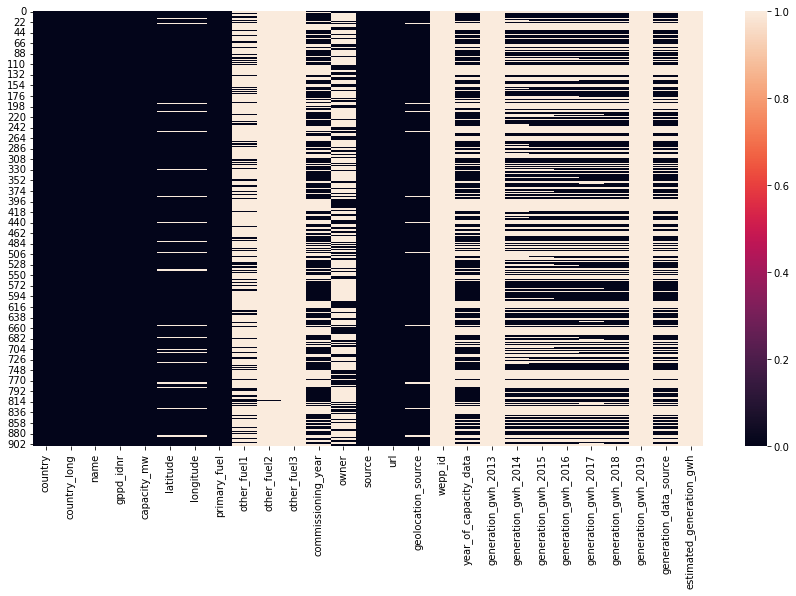

In [889]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

##### it shows many of the null values

In [890]:
df['total_generation'] = df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017']+df['generation_gwh_2018']

In [891]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,3637.554320
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,27859.499736


In [892]:
df = df.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis = 1)

In [893]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN,3637.554320
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN,27859.499736


## Imputation:

In [894]:
variable=[var for var in df.columns if df[var].isnull().mean()]

In [895]:
variable

['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh',
 'total_generation']

In [896]:
df['generation_data_source'].fillna('missing',inplace=True)
df['generation_data_source'].unique()

array(['missing', 'Central Electricity Authority'], dtype=object)

In [897]:
df['geolocation_source'].fillna('missing',inplace=True)

In [898]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)

In [899]:
df['owner'].fillna('missing',inplace=True)

In [900]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

In [901]:
df['other_fuel1'].fillna('Missing',inplace=True)

In [902]:
df['other_fuel2'].fillna('missing',inplace=True)

In [903]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)

In [904]:
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [905]:
df['total_generation'].fillna(df['total_generation'].mean(),inplace=True)

In [906]:
df=df.dropna(axis=1)

In [907]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
total_generation          0
dtype: int64

In [908]:
df.isnull().values.any()

False

In [909]:
df.shape

(907, 18)

<AxesSubplot:>

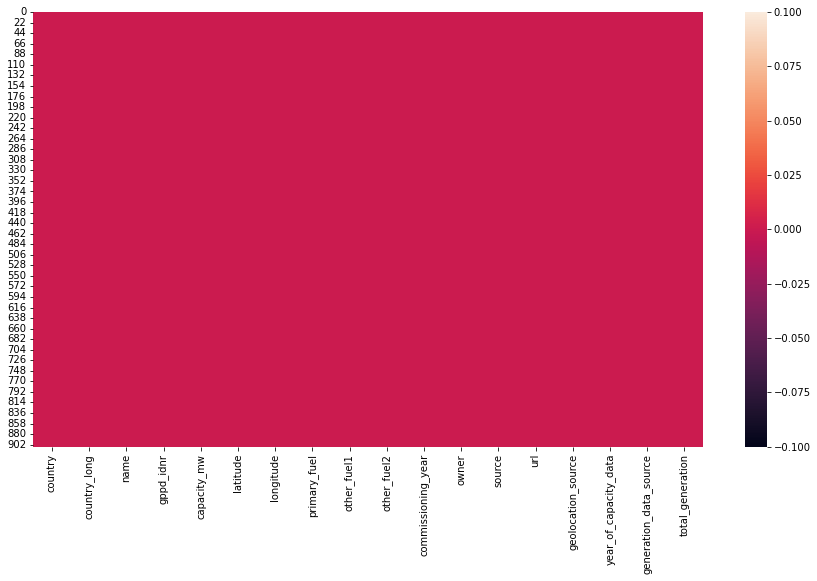

In [910]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   other_fuel2             907 non-null    object 
 10  commissioning_year      907 non-null    float64
 11  owner                   907 non-null    object 
 12  source                  907 non-null    object 
 13  url                     907 non-null    object 
 14  geolocation_source      907 non-null    ob

#### No null valeus are present

## Visualisation:

<AxesSubplot:xlabel='primary_fuel', ylabel='total_generation'>

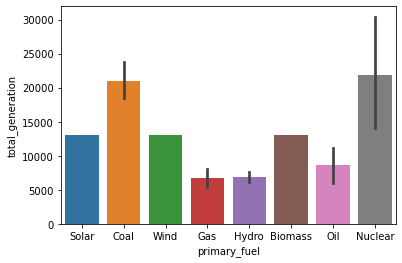

In [912]:
 sns.barplot(x="primary_fuel", y="total_generation", data=df)

<AxesSubplot:xlabel='total_generation', ylabel='source'>

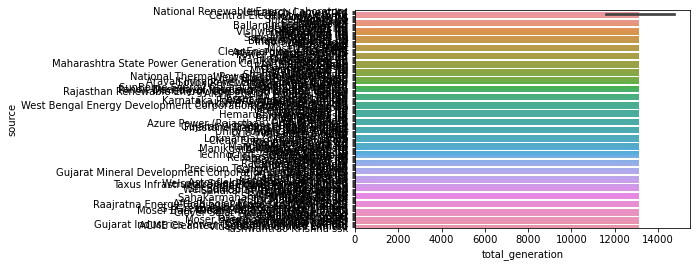

In [913]:
sns.barplot(x="total_generation", y="source", data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='total_generation'>

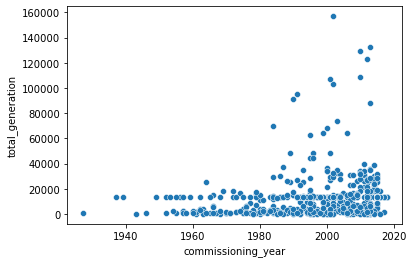

In [914]:
sns.scatterplot(x="commissioning_year", y="total_generation", data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='total_generation'>

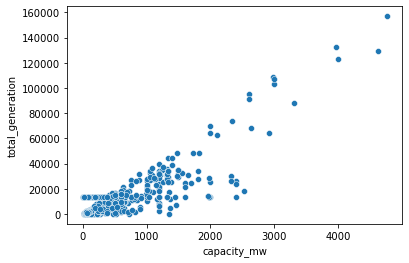

In [915]:
sns.scatterplot(x="capacity_mw", y="total_generation", data=df)

## Correlation:

In [916]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,total_generation
capacity_mw,1.000000,0.050984,0.195882,-0.004072,NaN,0.743773
latitude,0.050984,1.000000,0.036362,0.034519,NaN,0.036533
longitude,0.195882,0.036362,1.000000,-0.159025,NaN,0.034937
commissioning_year,-0.004072,0.034519,-0.159025,1.000000,NaN,0.153340
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN
total_generation,0.743773,0.036533,0.034937,0.153340,NaN,1.000000


<AxesSubplot:>

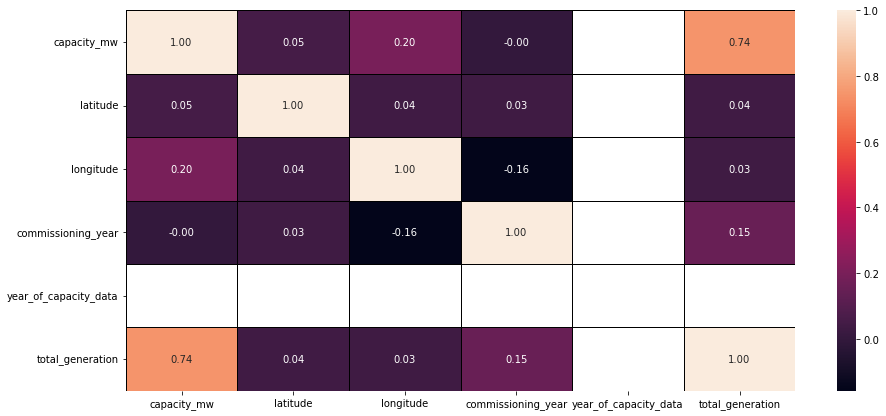

In [917]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

##### commissioning_year and capacity_mw are not realated to total_generation

## Descriptive statestics:

In [918]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,total_generation
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,13114.831488
std,590.085456,6.079148,4.812291,15.734928,0.0,13878.553807
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,7362.950625
50%,59.200000,21.281800,76.979200,2014.000000,2019.0,13114.831488
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,13114.831488
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,156908.000000


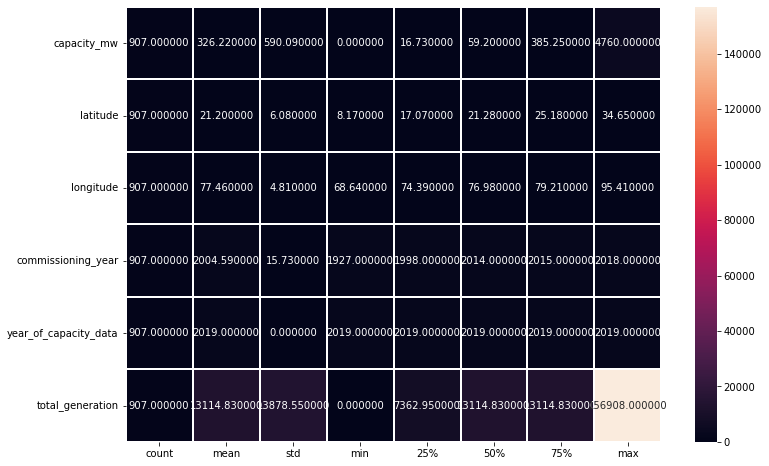

In [919]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.describe().transpose(),2),linewidth=2,annot=True,fmt="f")

plt.savefig('heatmap.png')
plt.show()

## Checking outliers:

capacity_mw                AxesSubplot(0.125,0.816017;0.0945122x0.0639831)
latitude                 AxesSubplot(0.238415,0.816017;0.0945122x0.0639...
longitude                AxesSubplot(0.351829,0.816017;0.0945122x0.0639...
commissioning_year       AxesSubplot(0.465244,0.816017;0.0945122x0.0639...
year_of_capacity_data    AxesSubplot(0.578659,0.816017;0.0945122x0.0639...
total_generation         AxesSubplot(0.692073,0.816017;0.0945122x0.0639...
dtype: object

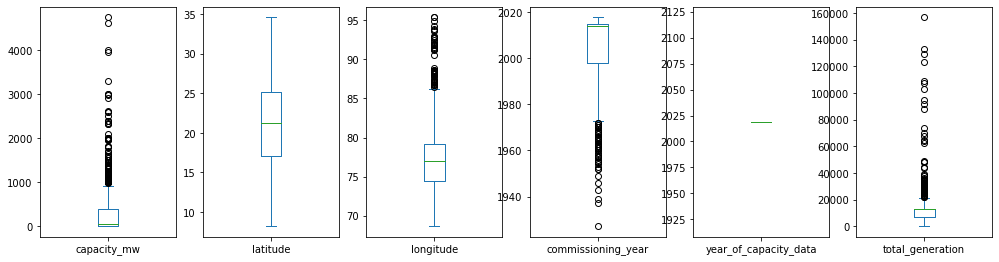

In [920]:
df.plot(kind='box', subplots=True, layout=(10,7),figsize=(20,50))

## Encoding:

In [921]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [922]:
df['primary_fuel']= label_encoder.fit_transform(df['primary_fuel'])
  
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [923]:
df3 = df.apply(pd.to_numeric,errors='coerce')

In [924]:
df2=df3.drop(['year_of_capacity_data'],axis=1)

In [925]:
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_data_source,total_generation
0,NaN,NaN,NaN,NaN,2.5,28.1839,73.2407,6,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,13114.831488
1,NaN,NaN,NaN,NaN,98.0,24.7663,74.6090,1,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,13114.831488
2,NaN,NaN,NaN,NaN,39.2,21.9038,69.3732,7,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,13114.831488
3,NaN,NaN,NaN,NaN,135.0,23.8712,91.3602,2,NaN,NaN,2004.0,NaN,NaN,NaN,NaN,NaN,3637.554320
4,NaN,NaN,NaN,NaN,1800.0,21.9603,82.4091,1,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,NaN,NaN,NaN,NaN,1600.0,16.2949,77.3568,1,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,13114.831488
903,NaN,NaN,NaN,NaN,3.0,12.8932,78.1654,6,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,13114.831488
904,NaN,NaN,NaN,NaN,25.5,15.2758,75.5811,7,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,13114.831488
905,NaN,NaN,NaN,NaN,80.0,24.3500,73.7477,1,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,13114.831488


In [926]:
df2=df2.dropna(axis=1)

## Removing Outliers:

In [927]:
z= np.abs(zscore(df2))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,total_generation
0,0.548908,1.149805,0.878280,1.225688,0.407327,0.000000
1,0.386977,0.587311,0.593788,0.967877,0.661679,0.000000
2,0.486679,0.116179,1.682394,1.664401,0.661679,0.000000
3,0.324240,0.439989,2.889052,0.529164,0.037788,0.683249
4,2.498942,0.125479,1.027976,0.967877,0.661679,1.062993
...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,0.725267,0.000000
903,0.548060,1.366853,0.145644,1.225688,0.661679,0.000000
904,0.509909,0.974707,0.391673,1.664401,0.661679,0.000000
905,0.417498,0.518793,0.772866,0.967877,0.661679,0.000000


In [928]:
z.shape

(907, 6)

In [929]:
np.where(z>3)

(array([ 15,  15, 143, 143, 147, 179, 183, 209, 209, 222, 244, 308, 308,
        323, 333, 340, 342, 360, 363, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 494, 494, 499, 519, 538, 541, 546,
        573, 577, 583, 601, 621, 638, 648, 648, 657, 657, 695, 695, 706,
        709, 721, 724, 726, 726, 728, 767, 786, 786, 788, 807, 808, 808,
        818, 847, 848, 880, 880], dtype=int64),
 array([0, 5, 0, 5, 0, 2, 2, 0, 5, 4, 2, 0, 5, 2, 2, 2, 4, 2, 0, 0, 5, 4,
        0, 2, 2, 4, 4, 4, 0, 4, 0, 5, 0, 5, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4,
        2, 0, 5, 0, 5, 0, 5, 4, 4, 5, 5, 0, 5, 4, 0, 0, 5, 0, 4, 0, 5, 2,
        2, 4, 0, 5], dtype=int64))

In [930]:
df_new=df2[(z<3).all(axis=1)]

In [931]:
print('Old dataframe',df2.shape)
print('New dataframe',df_new.shape)


Old dataframe (907, 6)
New dataframe (851, 6)


## % data loss

In [932]:
loss_percentage=(907-851)/907*100
print(loss_percentage,'%')

6.174200661521499 %


In [933]:
x=df_new.drop(columns=['capacity_mw'],axis=1)
y=df_new['capacity_mw']


In [934]:
x

,latitude,longitude,primary_fuel,commissioning_year,total_generation
0,28.1839,73.2407,6,2011.0,13114.831488
1,24.7663,74.6090,1,2015.0,13114.831488
2,21.9038,69.3732,7,2015.0,13114.831488
3,23.8712,91.3602,2,2004.0,3637.554320
4,21.9603,82.4091,1,2015.0,27859.499736
...,...,...,...,...,...
902,16.2949,77.3568,1,2016.0,13114.831488
903,12.8932,78.1654,6,2015.0,13114.831488
904,15.2758,75.5811,7,2015.0,13114.831488
905,24.3500,73.7477,1,2015.0,13114.831488


In [935]:
x.shape,y.shape

((851, 5), (851,))

In [936]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

## prediction with capacity_mw:

## Regression Model:

In [937]:
ada=AdaBoostRegressor()
ada.fit(x_test,y_test)

AdaBoostRegressor()

In [938]:
y_pred=ada.predict(x_test)
y_pred.shape

(213,)

In [939]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.8255615864993526


In [940]:
LR=LinearRegression()
LR.fit(x_test,y_test)
y_pred=LR.predict(x_test)
y_pred.shape

(213,)

In [941]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.4417072524564529


In [942]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,Missing,missing,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,missing,13114.831488
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,Missing,missing,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,missing,13114.831488
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,Missing,missing,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,missing,13114.831488
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,Missing,missing,2004.0,missing,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,3637.554320
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Oil,missing,2015.0,missing,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,Oil,missing,2016.0,missing,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,13114.831488
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,Missing,missing,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,missing,13114.831488
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,Missing,missing,2015.0,missing,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,missing,13114.831488
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,Missing,missing,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,missing,13114.831488


##### Out of two metrics adaboostregressor shows the best R square score

##### since this data is continues so we are going to building the regression